In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Loading Customer Dataset**

In [ ]:
import pandas as pd
import re
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/TextClassification/jobs_crawl_filter_jobsuche_en.csv', delimiter='|', error_bad_lines=False)

# Preprocess and clean text data
df['title'] = df['title'].str.lower() # Lowercase
df['description'] = df['description'].str.lower() # Lowercase

# Remove rows with all whitespace in all columns
df = df.dropna(how='all', subset=df.columns[1:], inplace=False)


# Define a regular expression pattern to match timestamps
timestamp_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'

df = df[~df['description'].str.contains(timestamp_pattern, na=False)]

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

existing_columns = df.columns.tolist()
columns_to_remove = ['id', 'raw_jobs_crawl_id', 'employer_description', 'insertion_date', 'occupation']

# Filter out columns that exist in the DataFrame
columns_to_remove = [col for col in columns_to_remove if col in existing_columns]

# Drop the selected columns
df = df.drop(columns=columns_to_remove)

# Remove rows with NaN values
df = df.dropna()

# Display the DataFrame as a table
df

<ipython-input-1-c788f9b3d183>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/TextClassification/jobs_crawl_filter_jobsuche_en.csv', delimiter='|', error_bad_lines=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/TextClassification/jobs_crawl_filter_jobsuche_en.csv'

In [ ]:
nan_count = df.isnull().sum().sum()
print(f"Number of NaN values in the DataFrame: {nan_count}")


In [ ]:
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)


**Making Data Cleaning and Data Pre-Processing Algorithms on Customer Dataset**

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/TextClassification/jobs_crawl_filter_jobsuche_en.csv', delimiter='|', error_bad_lines=False)

# Preprocess and clean text data
df['title'] = df['title'].str.lower()  # Lowercase
df['description'] = df['description'].str.lower()  # Lowercase

# Remove rows with all whitespace in all columns
df = df.dropna(how='all', subset=df.columns[1:], inplace=False)

# Define a regular expression pattern to match timestamps
timestamp_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
df = df[~df['description'].str.contains(timestamp_pattern, na=False)]

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

existing_columns = df.columns.tolist()
columns_to_remove = ['id', 'raw_jobs_crawl_id', 'employer_description', 'insertion_date', 'occupation']

# Filter out columns that exist in the DataFrame
columns_to_remove = [col for col in columns_to_remove if col in existing_columns]

# Drop the selected columns
df = df.drop(columns=columns_to_remove)

# Remove rows with NaN values
df = df.dropna()

# Define a function for text cleaning
def clean_text(text):
    if isinstance(text, str):
        # Remove symbols, special characters, and single letters
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])
        text = ' '.join([word for word in text.split() if len(word) > 1])
        # Remove specific words
        text = text.replace('mfd', '').replace('fmd', '')
        # Remove standalone letter 'u' with different spacing
        # text = text.replace(' u ', ' you ')
        return text
    return ""

# Apply text cleaning to title and description columns
df['title'] = df['title'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Remove duplicates
df = df.drop_duplicates()

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['title'] = df['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df['description'] = df['description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# Drop rows with empty 'title' or 'description'
df = df.dropna(subset=['title', 'description'])

# Display the DataFrame as a table
df


In [ ]:
# Save the cleaned DataFrame to a new CSV file
cleaned_dataset_path = '/content/drive/MyDrive/TextClassification/best_cleaned_dataset.csv'
df.to_csv(cleaned_dataset_path, index=False)

# Display the path to the saved file
cleaned_dataset_path


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/TextClassification/jobs_crawl_filter_jobsuche_en.csv', delimiter='|', error_bad_lines=False)

# Preprocess and clean text data
df['title'] = df['title'].str.lower()  # Lowercase
df['description'] = df['description'].str.lower()  # Lowercase

# Remove rows with all whitespace in all columns
df = df.dropna(how='all', subset=df.columns[1:], inplace=False)

# Define a regular expression pattern to match timestamps
timestamp_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
df = df[~df['description'].str.contains(timestamp_pattern, na=False)]

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

existing_columns = df.columns.tolist()
columns_to_remove = ['id', 'raw_jobs_crawl_id', 'employer_description', 'insertion_date', 'occupation']

# Filter out columns that exist in the DataFrame
columns_to_remove = [col for col in columns_to_remove if col in existing_columns]

# Drop the selected columns
df = df.drop(columns=columns_to_remove)

# Remove rows with NaN values
df = df.dropna()

# Define a function for text cleaning
def clean_text(text):
    if isinstance(text, str):
        # Remove symbols, special characters, and single letters
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])
        text = ' '.join([word for word in text.split() if len(word) > 1])
        # Remove specific words
        text = text.replace('mfd', '').replace('fmd', '')
        # Remove standalone letter 'u' with different spacing
        # text = text.replace(' u ', ' you ')
        return text
    return ""

# Apply text cleaning to title and description columns
df['title'] = df['title'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

# Remove stopwords and tokenize
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stop_words])
df['description'] = df['description'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word not in stop_words])

# Remove duplicates based on string representations of lists
df = df.astype(str)  # Convert all columns to string
df = df.drop_duplicates()

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['title'] = df['title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in eval(x)])
df['description'] = df['description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in eval(x)])

# Drop rows with empty 'title' or 'description'
df = df.dropna(subset=['title', 'description'])

# Display the DataFrame as a table
df


In [ ]:
nan_count = df.isnull().sum().sum()
print(f"Number of NaN values in the DataFrame: {nan_count}")


In [ ]:
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)


In [ ]:
# Save the cleaned DataFrame to a new CSV file
cleaned_dataset_path = '/content/drive/MyDrive/TextClassification/fm_normal_cleaned_dataset.csv'
df.to_csv(cleaned_dataset_path, index=False)

# Display the path to the saved file
cleaned_dataset_path


**Cheking Similarity Between Normal(Customer) and Nace Dataset Using Different Models**

In [ ]:
# 0

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

# Load the datasets
nace_path = "/content/drive/MyDrive/TextClassification/cleaned_nace_dataset.csv"
normal_path = "/content/drive/MyDrive/TextClassification/best_cleaned_dataset.csv"

nace_df = pd.read_csv(nace_path)
normal_df = pd.read_csv(normal_path)

# Convert 'title' and 'description' columns to strings
normal_df['title'] = normal_df['title'].astype(str)
normal_df['description'] = normal_df['description'].astype(str)

# Load the Universal Sentence Encoder
use_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embed = hub.load(use_url)

# Function to calculate similarity
def calculate_similarity(texts1, texts2):
    embeddings1 = embed(texts1)
    embeddings2 = embed(texts2)
    similarity = np.inner(embeddings1, embeddings2)
    return similarity

# Columns to compare
normal_columns = ['title', 'description']
nace_columns = ['level_1_title', 'level_1_description', 'level_2_title', 'level_2_description']

# Calculate similarity
for normal_col in normal_columns:
    for nace_col in nace_columns:
        similarity = calculate_similarity(normal_df[normal_col], nace_df[nace_col])
        print(f"Similarity between '{normal_col}' and '{nace_col}': {similarity.mean()}")


In [ ]:
!pip install sentence-transformers


In [ ]:
# 1 - Not Bad

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the datasets
normal_df = pd.read_csv('/content/drive/MyDrive/TextClassification/best_cleaned_dataset.csv')
nace_df = pd.read_csv('/content/drive/MyDrive/TextClassification/cleaned_nace_dataset.csv')

# Define a function to calculate similarity
def calculate_similarity(normal_col, nace_col):
    # Load a pre-trained model (e.g., 'paraphrase-MiniLM-L6-v2')
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

    # Compute embeddings
    normal_embeddings = model.encode(normal_col.tolist(), convert_to_tensor=True)
    nace_embeddings = model.encode(nace_col.tolist(), convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(normal_embeddings, nace_embeddings)

    return similarity

# Get the columns
normal_columns = ['title', 'description']
nace_columns = ['level_1_title', 'level_1_description', 'level_2_title', 'level_2_description']

# Calculate and print similarities
for normal_col in normal_columns:
    for nace_col in nace_columns:
        similarity = calculate_similarity(normal_df[normal_col], nace_df[nace_col])
        print(f"Similarity between '{normal_col}' and '{nace_col}': {similarity.mean().item()}")


In [ ]:
!pip install sentence-transformers


In [ ]:
# 2 - Still Good

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the datasets
normal_df = pd.read_csv('/content/drive/MyDrive/TextClassification/best_cleaned_dataset.csv')
nace_df = pd.read_csv('/content/drive/MyDrive/TextClassification/cleaned_nace_dataset.csv')

# Define a function to calculate similarity
def calculate_similarity(model, normal_col, nace_col):
    # Compute embeddings
    normal_embeddings = model.encode(normal_col.tolist(), convert_to_tensor=True)
    nace_embeddings = model.encode(nace_col.tolist(), convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(normal_embeddings, nace_embeddings)

    return similarity

# Get the columns
normal_columns = ['title', 'description']
nace_columns = ['level_1_title', 'level_1_description', 'level_2_title', 'level_2_description']

# Load a different pre-trained model (e.g., 'paraphrase-xlm-r-multilingual-v1')
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1', device = 'cuda')

# Calculate and print similarities
for normal_col in normal_columns:
    for nace_col in nace_columns:
        similarity = calculate_similarity(model, normal_df[normal_col], nace_df[nace_col])
        print(f"Similarity between '{normal_col}' and '{nace_col}': {similarity.mean().item()}")


In [ ]:
# 3 - This is the good model so far which is SciBERT model from Hugging face

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the datasets
normal_df = pd.read_csv('/content/drive/MyDrive/TextClassification/best_cleaned_dataset.csv')
nace_df = pd.read_csv('/content/drive/MyDrive/TextClassification/cleaned_nace_dataset.csv')

# Load a domain-specific pre-trained model (e.g., 'scibert_scivocab_uncased')
model = SentenceTransformer('allenai/scibert_scivocab_uncased', device='cuda')

# Define a function to calculate similarity
def calculate_similarity(model, normal_col, nace_col):
    # Compute embeddings
    normal_embeddings = model.encode(normal_col.tolist(), convert_to_tensor=True)
    nace_embeddings = model.encode(nace_col.tolist(), convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(normal_embeddings, nace_embeddings)

    return similarity

# Get the columns
normal_columns = ['title', 'description']
nace_columns = ['level_1_title', 'level_1_description', 'level_2_title', 'level_2_description']

# Calculate and print similarities
for normal_col in normal_columns:
    for nace_col in nace_columns:
        similarity = calculate_similarity(model, normal_df[normal_col], nace_df[nace_col])
        print(f"Similarity between '{normal_col}' and '{nace_col}': {similarity.mean().item()}")


In [ ]:
!pip install sentence-transformers


In [ ]:
# 4

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the datasets
normal_df = pd.read_csv('/content/drive/MyDrive/TextClassification/best_cleaned_dataset.csv')
nace_df = pd.read_csv('/content/drive/MyDrive/TextClassification/cleaned_nace_dataset.csv')

# Load a domain-specific pre-trained model (e.g., 'biomed_roberta_base')
model = SentenceTransformer('dmis-lab/biobert-base-cased-v1.1', device='cuda')

# Define a function to calculate similarity
def calculate_similarity(model, normal_col, nace_col):
    # Compute embeddings
    normal_embeddings = model.encode(normal_col.tolist(), convert_to_tensor=True)
    nace_embeddings = model.encode(nace_col.tolist(), convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(normal_embeddings, nace_embeddings)

    return similarity

# Get the columns
normal_columns = ['title', 'description']
nace_columns = ['level_1_title', 'level_1_description', 'level_2_title', 'level_2_description']

# Calculate and print similarities
for normal_col in normal_columns:
    for nace_col in nace_columns:
        similarity = calculate_similarity(model, normal_df[normal_col], nace_df[nace_col])
        print(f"Similarity between '{normal_col}' and '{nace_col}': {similarity.mean().item()}")


In [ ]:
# Model 4 - perfect Accuracy - Final Version

import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the datasets
normal_df = pd.read_csv('/content/drive/MyDrive/TextClassification/fm_cleaned_normal_dataset.csv')
nace_df = pd.read_csv('/content/drive/MyDrive/TextClassification/fm_cleaned_nace_dataset.csv')

# Load a domain-specific pre-trained model (e.g., 'biomed_roberta_base')
model = SentenceTransformer('dmis-lab/biobert-base-cased-v1.1', device='cuda')

# Define a function to calculate similarity
def calculate_similarity(model, normal_col, nace_col):
    # Compute embeddings
    normal_embeddings = model.encode(normal_col.tolist(), convert_to_tensor=True)
    nace_embeddings = model.encode(nace_col.tolist(), convert_to_tensor=True)

    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(normal_embeddings, nace_embeddings)

    return similarity

# Get the columns
normal_columns = ['title', 'description']
nace_columns = ['level_1_title', 'level_1_description', 'level_2_title', 'level_2_description']

# Calculate and print similarities
for normal_col in normal_columns:
    for nace_col in nace_columns:
        similarity = calculate_similarity(model, normal_df[normal_col], nace_df[nace_col])
        print(f"Similarity between '{normal_col}' and '{nace_col}': {similarity.mean().item()}")


**Text Classification Part**


In [ ]:
!pip install torch
!pip install transformers
!pip install scikit-learn


In [ ]:
import pandas as pd


# Load the datasets
nace_df = pd.read_csv('/content/drive/MyDrive/TextClassification/fm_cleaned_nace_dataset.csv')

normal_df = pd.read_csv('/content/drive/MyDrive/TextClassification/fm_cleaned_normal_dataset.csv')

dataset_label = pd.read_csv('/content/drive/MyDrive/TextClassification/dataset_with_label.csv')




In [ ]:
nace_df = nace_df[['level_1_title','level_1_description']]



In [ ]:
# Display the first few rows of the updated dataframe
nace_df

In [ ]:
# Assuming nace_df is your DataFrame
nace_df = nace_df.drop_duplicates(subset=['level_1_title', 'level_1_description'])

In [ ]:
nace_df

In [ ]:
dataset_label

In [ ]:
import pandas as pd


# Explode the lists in the 'nace_label' column
exploded_labels = dataset_label['nace_label'].explode()

# Count the occurrences of each label
label_counts = exploded_labels.value_counts()

# Print the counts for each label
print(label_counts)


In [ ]:
nace_df.value_counts()

In [ ]:
nace_df_unique = nace_df.drop_duplicates()



In [ ]:

nace_df_unique

In [ ]:
normal_df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import torch


In [ ]:
# Load the dataset
dataset_path = "/content/dataset_with_label.csv"
df = pd.read_csv(dataset_path)




In [ ]:
# Split the dataset
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize and create DataLoader
def tokenize_data(dataframe):
    # Tokenize input text
    input_ids = tokenizer(dataframe['description'].tolist(), return_tensors='pt', padding=True, truncation=True)

    # Use LabelEncoder to convert string labels to numeric format
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(dataframe['nace_label'].tolist())

    # Convert to torch tensor
    labels = torch.tensor(labels)

    return TensorDataset(input_ids['input_ids'], input_ids['attention_mask'], labels)


train_dataset = tokenize_data(train_df)
val_dataset = tokenize_data(val_df)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
num_labels = len(df['nace_label'].unique())


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=5e-5)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)
for epoch in range(60):  # You can adjust the number of epochs
    model.train()
    for batch in train_loader:
        inputs, attention_mask, labels = batch
        inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=inputs, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    model.eval()
    val_preds = []
    val_labels = []
    for batch in val_loader:
        inputs, attention_mask, labels = batch
        inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

        with torch.no_grad():
            outputs = model(input_ids=inputs, attention_mask=attention_mask, labels=labels)

        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)
        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

    print(f"Epoch {epoch + 1} - Validation Report:\n{classification_report(val_labels, val_preds)}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1 - Validation Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       0.80      1.00      0.89         4
           4       0.50      1.00      0.67         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.25      1.00      0.40         1
           8       0.67      1.00      0.80         4
           9       0.50      0.50      0.50         2
          10       0.33      0.50      0.40         2
          11       0.00      0.00      0.00         1
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         5
          15       0.50      0.25      0.33         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         3
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       0.33      0.50      0.40         2
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.33      0.50      0.40         2
           6       1.00      1.00      1.00         1
           7       0.33      1.00      0.50         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       0.33      0.50      0.40         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         5
          15       0.60      0.75      0.67         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.60      0.75      0.67         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       1.00      0.60      0.75         5
          15       0.75      0.75      0.75         4
          16       0.83      1.00      0.91         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.17      1.00      0.29         1
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.33      0.50      0.40         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       0.33      0.50      0.40         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         5
          15       0.75      0.75      0.75         4
          16       0.83      1.00      0.91         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       0.60      0.75      0.67         4
           9       0.67      1.00      0.80         2
          10       0.50      0.50      0.50         2
          11       0.25      1.00      0.40         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.20      0.33         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       0.33      0.50      0.40         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.25      1.00      0.40         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 11 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.60      0.75         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 12 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.60      0.75         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 13 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.60      0.75         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 14 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.60      0.75         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 15 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 16 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.67      0.67      0.67         3
           5       0.33      0.50      0.40         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 17 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 18 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 19 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 20 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 21 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 22 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 23 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 48 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 49 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 50 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 51 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 52 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 53 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 54 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 55 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 56 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 57 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 58 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 59 - Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         4
           4       0.67      0.67      0.67         3
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         4
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      0.40      0.57         5
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
torch.save(model.state_dict(), '/content/model.pkl')


In [ ]:
test_df=pd.read_csv('/content/fm_cleaned_normal_dataset.csv')

In [ ]:
# Tokenize and create DataLoader for test data
def tokenize_test_data(dataframe):
    # Tokenize input text
    input_ids = tokenizer(dataframe['description'].tolist(), return_tensors='pt', padding=True, truncation=True)

    # No labels for test data, so we only need input_ids and attention_mask
    return TensorDataset(input_ids['input_ids'], input_ids['attention_mask'])


# Create DataLoader for test data
test_dataset = tokenize_test_data(test_df)
test_loader = DataLoader(test_dataset, batch_size=8)


In [ ]:
# Make predictions on the test set
model.eval()
test_preds = []

for batch in test_loader:
    inputs, attention_mask = batch
    inputs, attention_mask = inputs.to(device), attention_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids=inputs, attention_mask=attention_mask)

    logits = outputs.logits
    preds = torch.argmax(logits, axis=1)
    test_preds.extend(preds.cpu().numpy())

In [ ]:
test_df['label'] = test_preds

In [ ]:
test_df

,title,description,label
0,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
1,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
2,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
3,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
4,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
...,...,...,...
6417,"['employee', 'cable', 'assembly']","['hkw', 'offering', 'temporary', 'employment',...",11
6418,"['assembly', 'worker']","['hkw', 'offering', 'temporary', 'employment',...",17
6419,"['trainee', 'hotel', 'specialist']","['hotel', 'elbflorenz', 'dresden', 'largest', ...",0
6420,"['project', 'manager', 'controlling']","['like', 'answer', 'question', 'nobody', 'ever...",10


In [ ]:
test_df.label.value_counts()

11    976
2     667
17    661
14    569
5     562
9     531
8     440
19    404
10    346
0     311
7     304
6     170
1     134
18    105
16     74
13     50
3      48
15     37
4      20
12     13
Name: label, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['nace_label'].tolist())


In [ ]:
predicted_labels = label_encoder.inverse_transform(test_preds)

In [ ]:
test_df['label_name'] = predicted_labels


In [ ]:
test_df

,title,description,label,label_name
0,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
1,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
2,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
3,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
4,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
...,...,...,...,...
6417,"['employee', 'cable', 'assembly']","['hkw', 'offering', 'temporary', 'employment',...",11,['manufacturing']
6418,"['assembly', 'worker']","['hkw', 'offering', 'temporary', 'employment',...",17,"['transportation', 'storage']"
6419,"['trainee', 'hotel', 'specialist']","['hotel', 'elbflorenz', 'dresden', 'largest', ...",0,"['accommodation', 'food', 'service', 'activity']"
6420,"['project', 'manager', 'controlling']","['like', 'answer', 'question', 'nobody', 'ever...",10,"['information', 'communication']"


In [ ]:
test_df.to_csv('/content/test_df_with_predictions.csv')

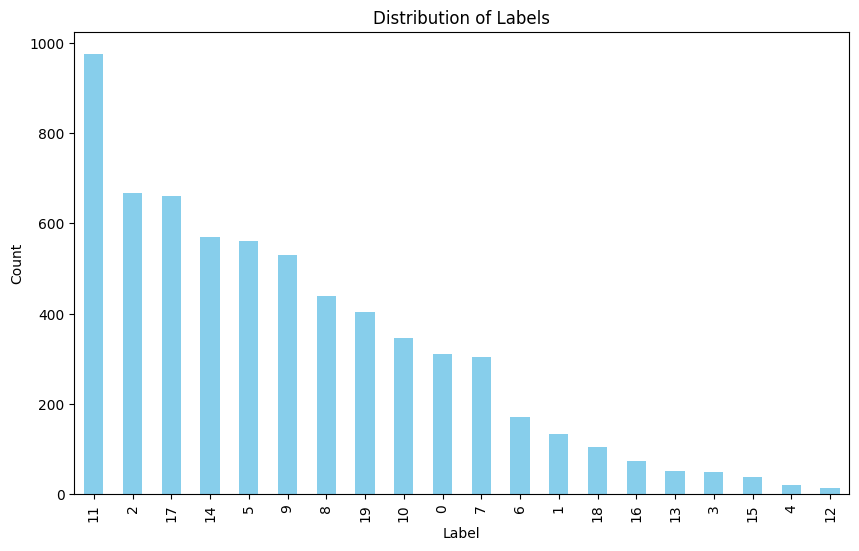

In [ ]:
import matplotlib.pyplot as plt

# Assuming test_df is your DataFrame
label_counts = test_df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


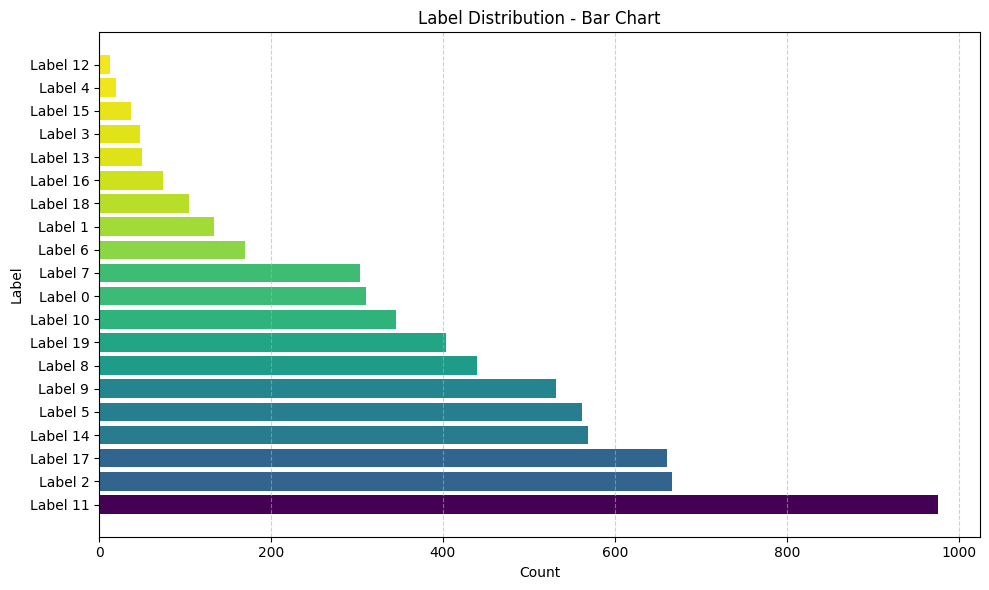

In [ ]:
# Bar Chart
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis_r(label_counts.values / max(label_counts.values))  # Color based on value counts
plt.barh([f"Label {label}" for label in label_counts.index], label_counts.values, color=colors)
plt.title('Label Distribution - Bar Chart')
plt.xlabel('Count')
plt.ylabel('Label')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [ ]:
plt.savefig('label_distribution_bar_chart.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
%pip install pandas transformers torch



Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Load the dataset to get the number of labels
dataset_path = "/content/drive/MyDrive/dataset_with_label.csv"
df = pd.read_csv(dataset_path)
num_labels = len(df['nace_label'].unique())

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
model.load_state_dict(torch.load('/content/drive/MyDrive/model.pkl', map_location=torch.device('cuda')))

device = torch.device('cuda')
model.to(device)

# Assuming 'test_df' contains the new data you want to predict on
test_df_path = "/content/drive/MyDrive/fm_cleaned_normal_dataset.csv"
test_df = pd.read_csv(test_df_path)

# Tokenize and create DataLoader for test data
def tokenize_test_data(dataframe):
    input_ids = tokenizer(dataframe['description'].tolist(), return_tensors='pt', padding=True, truncation=True)
    return TensorDataset(input_ids['input_ids'], input_ids['attention_mask'])

# Create DataLoader for test data
test_dataset = tokenize_test_data(test_df)
test_loader = DataLoader(test_dataset, batch_size=8)

# Make predictions on the test set
model.eval()
test_preds = []

for batch in test_loader:
    inputs, attention_mask = batch
    inputs, attention_mask = inputs.to(device), attention_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids=inputs, attention_mask=attention_mask)

    logits = outputs.logits
    preds = torch.argmax(logits, axis=1)
    test_preds.extend(preds.cpu().numpy())



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
test_df['label'] = test_preds

In [4]:
test_df

,title,description,label
0,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
1,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
2,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
3,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
4,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19
...,...,...,...
6417,"['employee', 'cable', 'assembly']","['hkw', 'offering', 'temporary', 'employment',...",11
6418,"['assembly', 'worker']","['hkw', 'offering', 'temporary', 'employment',...",17
6419,"['trainee', 'hotel', 'specialist']","['hotel', 'elbflorenz', 'dresden', 'largest', ...",0
6420,"['project', 'manager', 'controlling']","['like', 'answer', 'question', 'nobody', 'ever...",10


In [5]:
test_df.label.value_counts()

11    976
2     667
17    661
14    569
5     562
9     531
8     440
19    404
10    346
0     311
7     304
6     170
1     134
18    105
16     74
13     50
3      48
15     37
4      20
12     13
Name: label, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['nace_label'].tolist())


In [8]:
labels

array([19, 11, 17,  2, 11, 17,  5,  5,  2, 14, 11, 11, 14, 14, 14, 14, 14,
       19,  2, 14, 11, 11,  0, 11, 17, 17, 17, 11,  5,  5,  2,  5,  0,  0,
       14,  4,  2, 10, 19,  0,  9,  8, 13, 13,  2,  0, 19, 11,  2, 17, 11,
       19,  2, 19,  2, 10,  5, 14,  5,  0, 19,  2, 17,  0, 17, 14, 19, 14,
        0,  2, 17, 10,  9, 16,  0,  5, 19, 19, 17,  0, 19,  0, 11, 17, 18,
       18,  1, 18, 18, 18,  3,  3,  3, 14,  3,  3, 19, 17,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 13,  6,  4, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        8,  8,  8,  8,  8,  8, 16, 10,  6,  6,  6,  6,  6,  6,  6,  6,  6,
       13, 13, 13, 13,  6,  6,  3,  5,  3,  3,  3,  1,  1,  1,  1,  1,  1,
        1,  8,  7, 18, 18, 18, 18,  8,  8, 15, 15, 15, 15,  7,  7,  7,  7,
        7,  7, 15, 10, 10, 10, 10, 10, 10, 10,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 15, 15, 15, 15, 15, 15,  1,  1,  1,  1,  1, 13, 13, 13, 13, 13,
        9,  9,  9,  6,  6

In [9]:
predicted_labels = label_encoder.inverse_transform(test_preds)

In [10]:
predicted_labels

array(["['wholesale', 'retail', 'trade', 'repair', 'motor', 'vehicle', 'motorcycle']",
       "['wholesale', 'retail', 'trade', 'repair', 'motor', 'vehicle', 'motorcycle']",
       "['wholesale', 'retail', 'trade', 'repair', 'motor', 'vehicle', 'motorcycle']",
       ..., "['accommodation', 'food', 'service', 'activity']",
       "['information', 'communication']",
       "['accommodation', 'food', 'service', 'activity']"], dtype='<U118')

In [11]:
test_df['label_name'] = predicted_labels


In [13]:
result_df = test_df.groupby('label')['label_name'].first()
result_df.columns = ['label', 'label_name']


In [17]:
import pandas as pd

print(result_df)


label
0      ['accommodation', 'food', 'service', 'activity']
1     ['activity', 'household', 'employer', 'undiffe...
2     ['administrative', 'support', 'service', 'acti...
3                ['agriculture', 'forestry', 'fishing']
4                ['art', 'entertainment', 'recreation']
5                                      ['construction']
6                                         ['education']
7     ['electricity', 'gas', 'steam', 'air', 'condit...
8                ['financial', 'insurance', 'activity']
9     ['human', 'health', 'social', 'work', 'activity']
10                     ['information', 'communication']
11                                    ['manufacturing']
12                              ['mining', 'quarrying']
13                     ['other', 'service', 'activity']
14    ['professional', 'scientific', 'technical', 'a...
15    ['public', 'administration', 'defence', 'compu...
16                       ['real', 'estate', 'activity']
17                        ['transportation

In [15]:
test_df

,title,description,label,label_name
0,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
1,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
2,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
3,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
4,"['bakery', 'salesperson']","['back', 'new', 'job', 'combined', 'history', ...",19,"['wholesale', 'retail', 'trade', 'repair', 'mo..."
...,...,...,...,...
6417,"['employee', 'cable', 'assembly']","['hkw', 'offering', 'temporary', 'employment',...",11,['manufacturing']
6418,"['assembly', 'worker']","['hkw', 'offering', 'temporary', 'employment',...",17,"['transportation', 'storage']"
6419,"['trainee', 'hotel', 'specialist']","['hotel', 'elbflorenz', 'dresden', 'largest', ...",0,"['accommodation', 'food', 'service', 'activity']"
6420,"['project', 'manager', 'controlling']","['like', 'answer', 'question', 'nobody', 'ever...",10,"['information', 'communication']"
